In [1]:
import os

print(os.listdir()) 
import pandas as pd

# Load the dataset
df = pd.read_csv('complete_dataset (1).csv')

# Display first few rows
df.head()
import pandas as pd

# Load dataset
df = pd.read_csv("complete_dataset (1).csv")

# Convert date column to datetime format
df["date"] = pd.to_datetime(df["date"])
df.set_index("date", inplace=True)

# Display first few rows
df.head()
# Fill missing values with the median
df["solar_exposure"].fillna(df["solar_exposure"].median(), inplace=True)
df["rainfall"].fillna(df["rainfall"].median(), inplace=True)



['analysis.ipynb', 'complete_dataset (1).csv', 'Electricity Demand Forecast.ipynb', 'Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025']


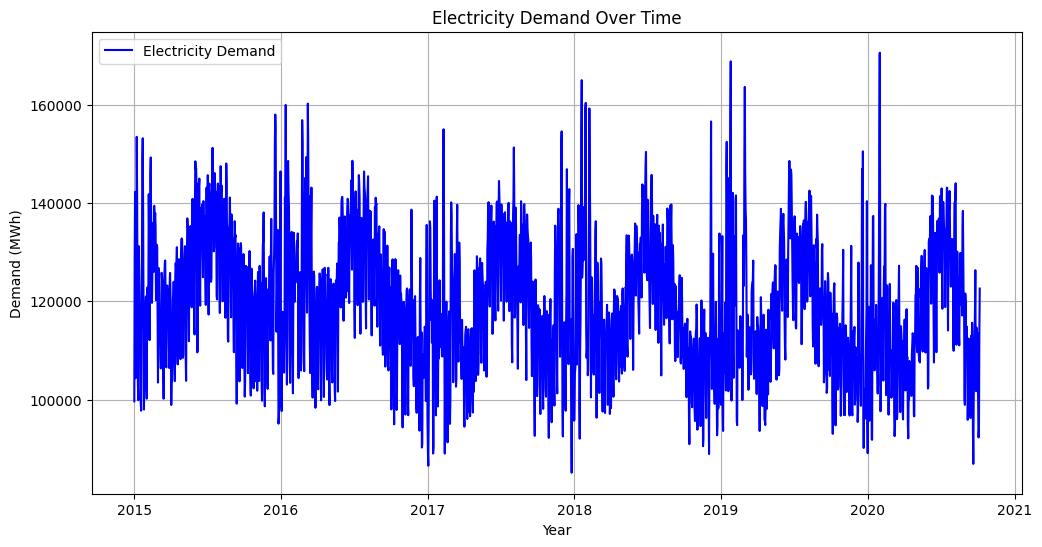

In [2]:
#Visualize Electricity Demand Trends- Plot Demand Over Time
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df["demand"], label="Electricity Demand", color="blue")
plt.xlabel("Year")
plt.ylabel("Demand (MWh)")
plt.title("Electricity Demand Over Time")
plt.legend()
plt.grid()
plt.show()


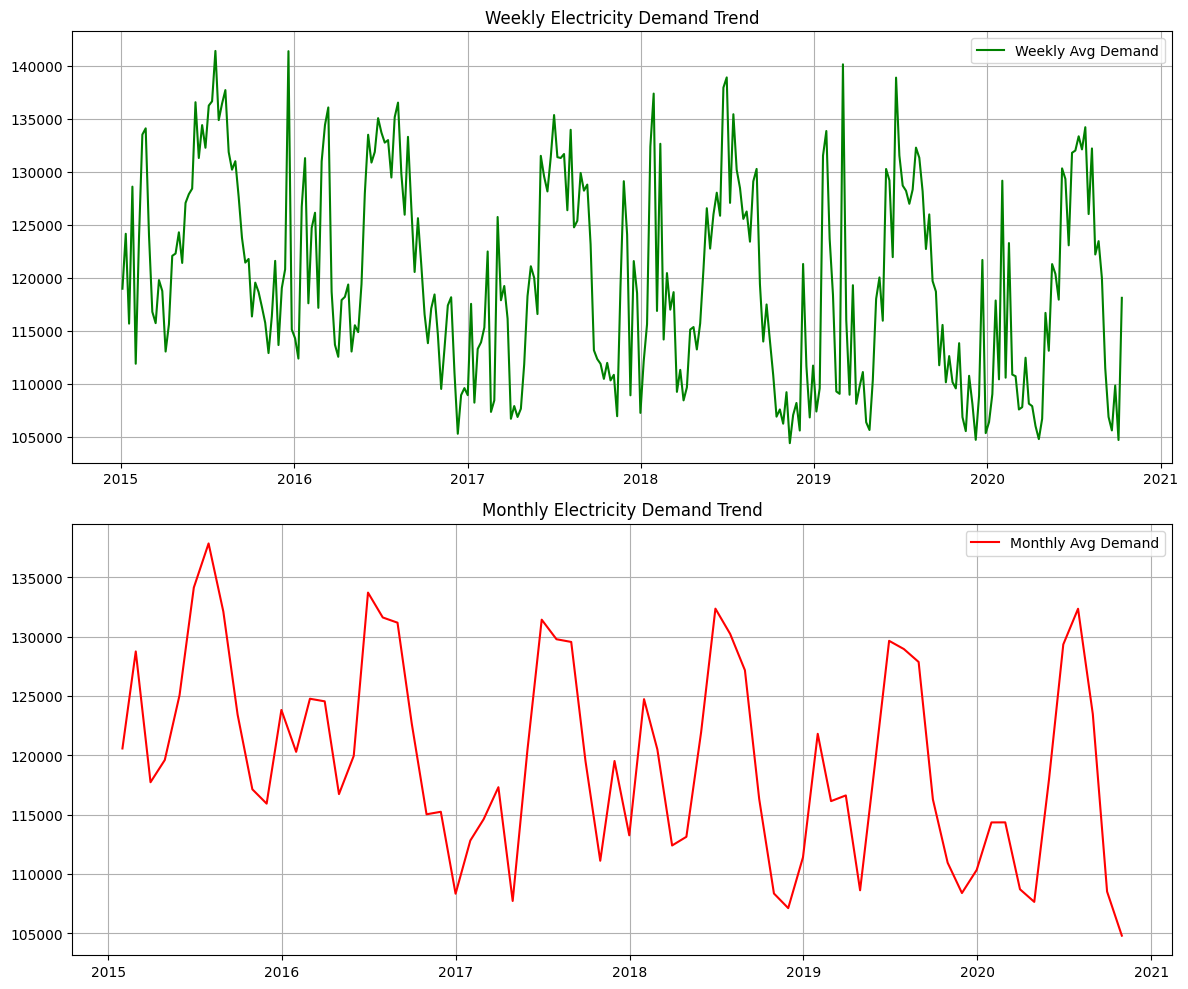

In [3]:
#Weekly & Monthly Demand Trends -Identifying Cyclic Patterns
df_weekly = df["demand"].resample("W").mean()
df_monthly = df["demand"].resample("M").mean()

fig, ax = plt.subplots(2, 1, figsize=(12, 10))

ax[0].plot(df_weekly.index, df_weekly, label="Weekly Avg Demand", color="green")
ax[0].set_title("Weekly Electricity Demand Trend")
ax[0].legend()
ax[0].grid()

ax[1].plot(df_monthly.index, df_monthly, label="Monthly Avg Demand", color="red")
ax[1].set_title("Monthly Electricity Demand Trend")
ax[1].legend()
ax[1].grid()

plt.tight_layout()
plt.show()


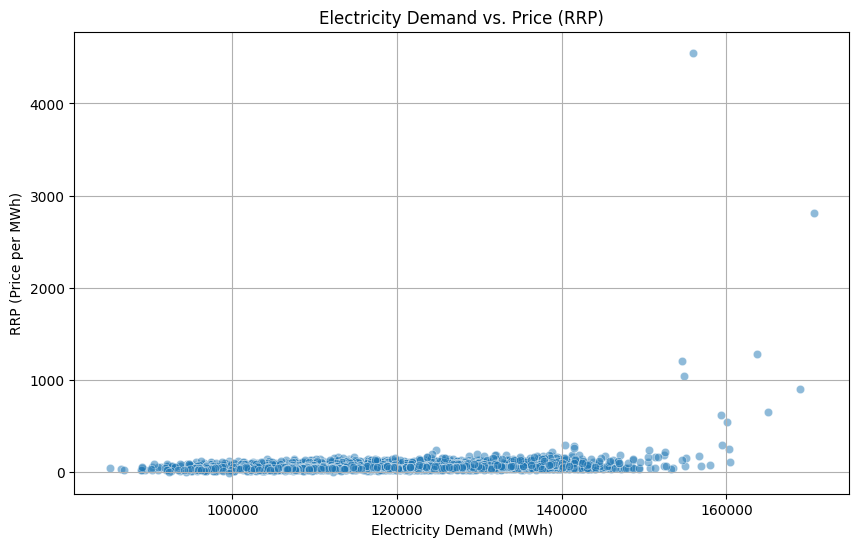

,demand,RRP
demand,1.000000,0.217538
RRP,0.217538,1.000000


In [4]:
#Correlation Between Demand and Price - Scatter Plot of Demand vs. Price (RRP)
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["demand"], y=df["RRP"], alpha=0.5)
plt.xlabel("Electricity Demand (MWh)")
plt.ylabel("RRP (Price per MWh)")
plt.title("Electricity Demand vs. Price (RRP)")
plt.grid()
plt.show()

# Check correlation values
df[["demand", "RRP"]].corr()


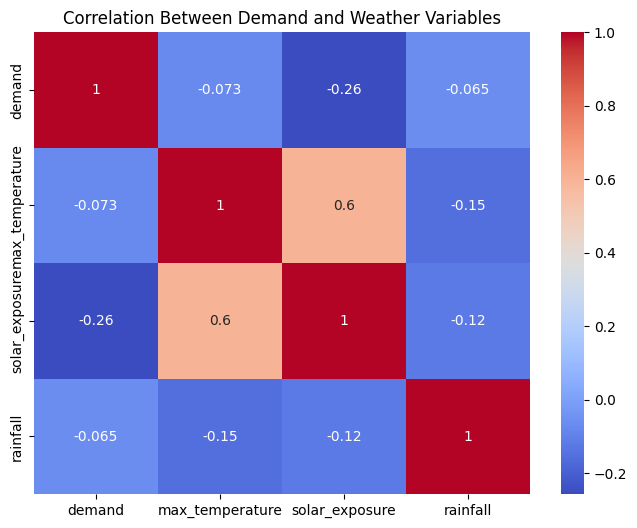

In [5]:
#Weather Impact on Demand- Heatmap of Demand vs. Weather Variables
plt.figure(figsize=(8, 6))
sns.heatmap(df[["demand", "max_temperature", "solar_exposure", "rainfall"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Demand and Weather Variables")
plt.show()


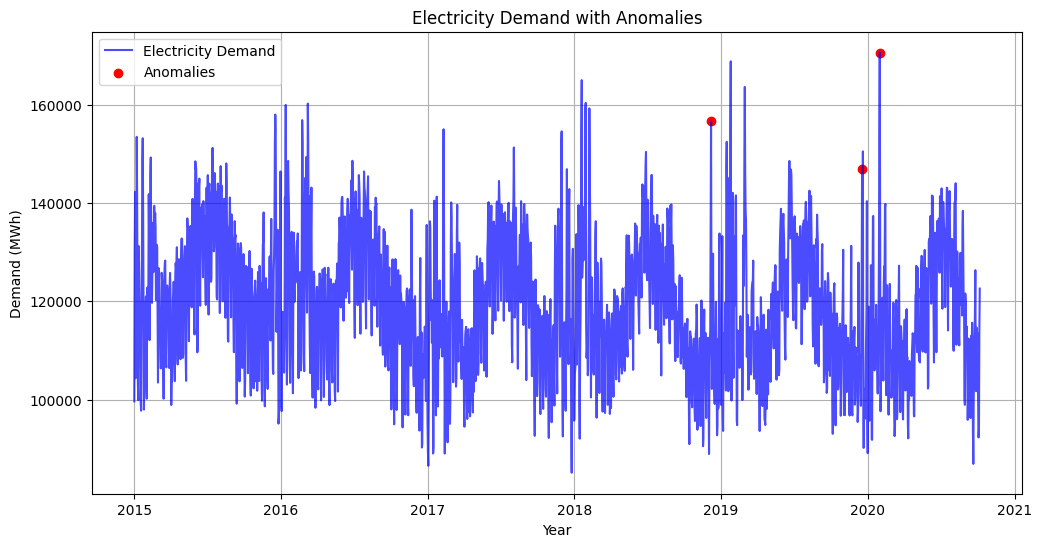

In [6]:
#Anomaly Detection in Demand -Detecting Sudden Spikes & Drops
# Compute rolling mean & standard deviation
df["demand_rolling_mean"] = df["demand"].rolling(window=30).mean()
df["demand_rolling_std"] = df["demand"].rolling(window=30).std()

# Identify anomalies (values outside 3 standard deviations)
df["demand_anomaly"] = (df["demand"] > (df["demand_rolling_mean"] + 3 * df["demand_rolling_std"])) | \
                        (df["demand"] < (df["demand_rolling_mean"] - 3 * df["demand_rolling_std"]))

# Plot anomalies
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["demand"], label="Electricity Demand", color="blue", alpha=0.7)
plt.scatter(df.index[df["demand_anomaly"]], df["demand"][df["demand_anomaly"]], color="red", label="Anomalies", marker="o")
plt.xlabel("Year")
plt.ylabel("Demand (MWh)")
plt.title("Electricity Demand with Anomalies")
plt.legend()
plt.grid()
plt.show()


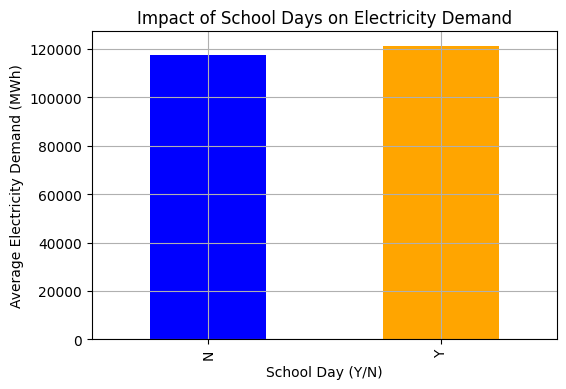

In [7]:
# Group data by school days
school_day_demand = df.groupby("school_day")["demand"].mean()

# Plot comparison
plt.figure(figsize=(6, 4))
school_day_demand.plot(kind="bar", color=["blue", "orange"])
plt.xlabel("School Day (Y/N)")
plt.ylabel("Average Electricity Demand (MWh)")
plt.title("Impact of School Days on Electricity Demand")
plt.grid()
plt.show()


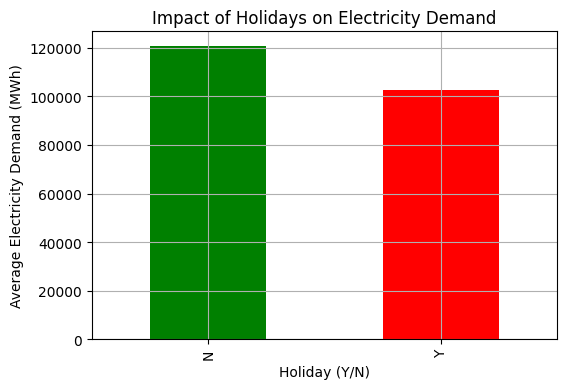

In [8]:
# the Impact of Holidays on Demand
# Group data by holiday status
holiday_demand = df.groupby("holiday")["demand"].mean()

# Plot holiday vs. non-holiday demand
plt.figure(figsize=(6, 4))
holiday_demand.plot(kind="bar", color=["green", "red"])
plt.xlabel("Holiday (Y/N)")
plt.ylabel("Average Electricity Demand (MWh)")
plt.title("Impact of Holidays on Electricity Demand")
plt.grid()
plt.show()


In [9]:
# Demand before, during, and after holidays.
# Create a column for previous day demand
df["prev_day_demand"] = df["demand"].shift(1)

# Compare demand changes around holidays
holiday_effect = df[df["holiday"] == "Y"][["demand", "prev_day_demand"]]

# Calculate percentage change in demand
holiday_effect["demand_change (%)"] = ((holiday_effect["demand"] - holiday_effect["prev_day_demand"]) / holiday_effect["prev_day_demand"]) * 100

# Display first few rows
print(holiday_effect.head())


               demand  prev_day_demand  demand_change (%)
date                                                     
2015-01-01   99635.03              NaN                NaN
2015-01-26  103769.48         97959.46           5.931045
2015-03-09  108282.48        106348.78           1.818263
2015-04-03   98891.06        113838.41         -13.130322
2015-04-04  103999.17         98891.06           5.165391


In [13]:
# Special Event & Anomaly Detection
# Identify demand anomalies
anomalies = df[df["demand_anomaly"]]

# Compare anomalies with holidays and school days
event_anomalies = anomalies[["demand", "holiday", "school_day"]]

# Display first few detected anomalies
print(event_anomalies.head())


                demand holiday school_day
date                                     
2018-12-07  156648.405       N          Y
2019-12-18  146990.890       N          Y
2020-01-31  170653.840       N          Y


Total negative RRP periods: 3


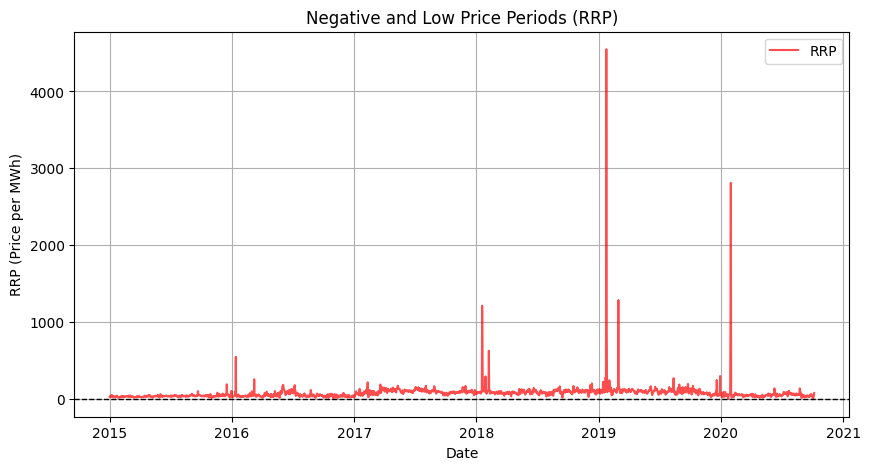

In [ ]:
# when and why electricity prices drop to negative values.

negative_rrp = df[df["RRP"] < 0]

# Count occurrences
print(f"Total negative RRP periods: {len(negative_rrp)}")

# Plot negative RRP occurrences over time
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["RRP"], label="RRP", color="red", alpha=0.7)
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.xlabel("Date")
plt.ylabel("RRP (Price per MWh)")
plt.title("Negative and Low Price Periods (RRP)")
plt.legend()
plt.grid()
plt.show()


In [16]:
# Compare demand during negative and positive RRP periods
avg_demand_neg_rrp = negative_rrp["demand"].mean()
avg_demand_pos_rrp = df[df["RRP"] >= 0]["demand"].mean()

print(f"Average demand during negative RRP: {avg_demand_neg_rrp} MWh")
print(f"Average demand during positive RRP: {avg_demand_pos_rrp} MWh")


Average demand during negative RRP: 101372.56333333331 MWh
Average demand during positive RRP: 120062.09977413219 MWh


In [17]:
#Create Lagged Features for Demand & Weather
# Create lagged features (previous day's demand & weather conditions)
df["demand_lag_1"] = df["demand"].shift(1)  # Previous day
df["demand_lag_7"] = df["demand"].shift(7)  # One week ago
df["demand_lag_30"] = df["demand"].shift(30)  # One month ago

# Create lagged weather variables
df["temp_lag_1"] = df["max_temperature"].shift(1)  # Previous day temperature
df["solar_lag_1"] = df["solar_exposure"].shift(1)  # Previous day solar exposure
df["rainfall_lag_1"] = df["rainfall"].shift(1)  # Previous day rainfall


In [19]:
# Extract month from the datetime index
df["month"] = df.index.month  # 1 to 12

# Verify that the month column is created
print(df[["month", "demand"]].head())


            month      demand
date                         
2015-01-01      1   99635.030
2015-01-02      1  129606.010
2015-01-03      1  142300.540
2015-01-04      1  104330.715
2015-01-05      1  118132.200


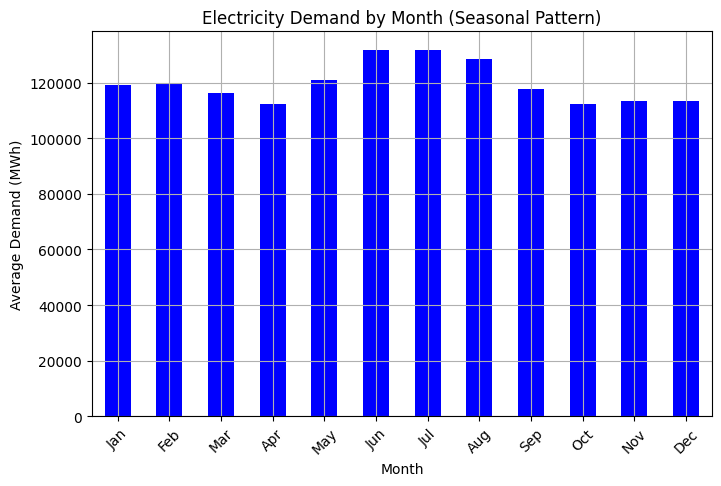

In [20]:
import matplotlib.pyplot as plt

# Group by month and calculate the average demand
monthly_demand = df.groupby("month")["demand"].mean()

# Plot the seasonal demand trend
plt.figure(figsize=(8, 5))
monthly_demand.plot(kind="bar", color="blue")

# Add labels and title
plt.xlabel("Month")  # Ensure x-axis labels are displayed
plt.ylabel("Average Demand (MWh)")
plt.title("Electricity Demand by Month (Seasonal Pattern)")
plt.xticks(ticks=range(12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=45)
plt.grid()
plt.show()


In [22]:
# Extract day of the week from the datetime index
df["day_of_week"] = df.index.dayofweek  # Monday = 0, Sunday = 6

# Verify that the day_of_week column is created
print(df[["day_of_week", "demand"]].head())


            day_of_week      demand
date                               
2015-01-01            3   99635.030
2015-01-02            4  129606.010
2015-01-03            5  142300.540
2015-01-04            6  104330.715
2015-01-05            0  118132.200


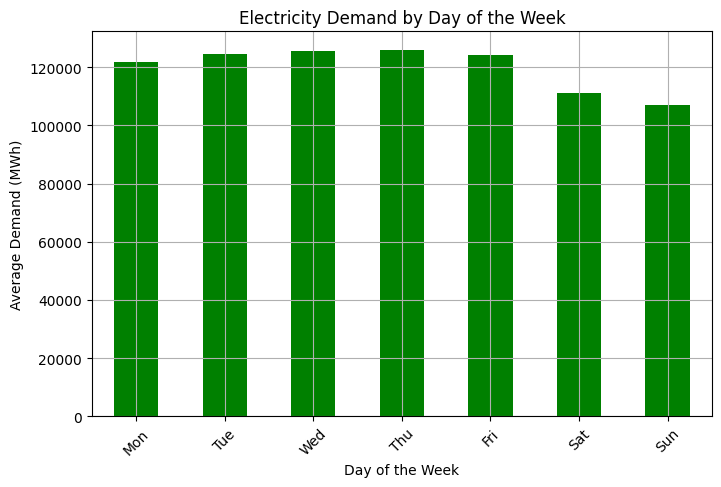

In [23]:
import matplotlib.pyplot as plt

# Group by day of the week and calculate the average demand
weekly_demand = df.groupby("day_of_week")["demand"].mean()

# Plot the weekly demand trend
plt.figure(figsize=(8, 5))
weekly_demand.plot(kind="bar", color="green")

# Add labels and title
plt.xlabel("Day of the Week")
plt.ylabel("Average Demand (MWh)")
plt.title("Electricity Demand by Day of the Week")
plt.xticks(ticks=range(7), labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], rotation=45)
plt.grid()
plt.show()


In [24]:
#Check Data Completeness & Handle Missing Values
import pandas as pd

# Load dataset
df = pd.read_csv("complete_dataset (1).csv")

# Convert 'date' column to datetime format
df["date"] = pd.to_datetime(df["date"])
df.set_index("date", inplace=True)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Fill missing values with median for numerical columns
df.fillna(df.median(), inplace=True)


Missing Values:
 demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     1
rainfall           3
school_day         0
holiday            0
dtype: int64


c:\Python\Python37\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [25]:
# Extract time-based features
df["day_of_week"] = df.index.dayofweek  # Monday = 0, Sunday = 6
df["month"] = df.index.month  # 1 to 12
df["year"] = df.index.year
df["day_of_year"] = df.index.dayofyear  # 1 to 365
df["week_of_year"] = df.index.isocalendar().week  # Week number
df["is_weekend"] = df["day_of_week"].apply(lambda x: 1 if x >= 5 else 0)  # 1 if weekend, 0 if weekday


In [26]:
# Lagged demand features
df["demand_lag_1"] = df["demand"].shift(1)  # Previous day's demand
df["demand_lag_7"] = df["demand"].shift(7)  # One week ago
df["demand_lag_30"] = df["demand"].shift(30)  # One month ago

# Lagged weather features
df["temp_lag_1"] = df["max_temperature"].shift(1)  # Previous day temperature
df["solar_lag_1"] = df["solar_exposure"].shift(1)  # Previous day solar exposure
df["rainfall_lag_1"] = df["rainfall"].shift(1)  # Previous day rainfall


In [27]:
from sklearn.preprocessing import StandardScaler

# List of numerical features to scale
num_features = ["demand", "demand_lag_1", "demand_lag_7", "demand_lag_30", 
                "max_temperature", "solar_exposure", "rainfall", 
                "temp_lag_1", "solar_lag_1", "rainfall_lag_1"]

# Apply standard scaling
scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])

# Encode categorical variables
df = pd.get_dummies(df, columns=["day_of_week", "month", "is_weekend"], drop_first=True)


In [28]:
df.to_csv("processed_electricity_forecasting.csv")
print("Processed dataset saved as 'processed_electricity_forecasting.csv'")


Processed dataset saved as 'processed_electricity_forecasting.csv'
